# Visualize / Stack `gctree` visualizations

This notebook will read in the gctree svg's from each PR and stack them into single images for easier comparison.

In [24]:
import os
import sys

import pandas as pd
import svg_stack as ss
from IPython.display import SVG as ip_SVG
from IPython.display import display as ip_display
import svgutils.transform as sg
from svgutils.compose import *

In [42]:
manifest_path = '../metadata.PR2.csv'
results_dir = "results/gctrees"
svg_filename = "gctree.inference.1.svg"
output_dir = "output/gctree_svg_stack"

In [43]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

manifest_df = pd.read_csv(manifest_path)
manifest_df.head()
# manifest_df.query(f"PR == 2.01")

PR  mouse  plate   gc node cell_type  hc_barcode  lc_barcode  \
0  2.01     10      1  10B   LP        GC          16          10   
1  2.01      1      2   1A   RP        GC           9           9   
2  2.01      1      3   1C   RI        GC           2           1   
3  2.01      1      4   1D   LI        GC          14           2   
4  2.01      2      5   2A   RP        GC          10          11   

               row                         col  
0  A.B.C.D.E.F.G.H  1.2.3.4.5.6.7.8.9.10.11.12  
1  A.B.C.D.E.F.G.H  1.2.3.4.5.6.7.8.9.10.11.12  
2  A.B.C.D.E.F.G.H  1.2.3.4.5.6.7.8.9.10.11.12  
3  A.B.C.D.E.F.G.H  1.2.3.4.5.6.7.8.9.10.11.12  
4  A.B.C.D.E.F.G.H  1.2.3.4.5.6.7.8.9.10.11.12

In [44]:
print(manifest_df.PR.unique())

[2.01 2.02 2.03 2.04]


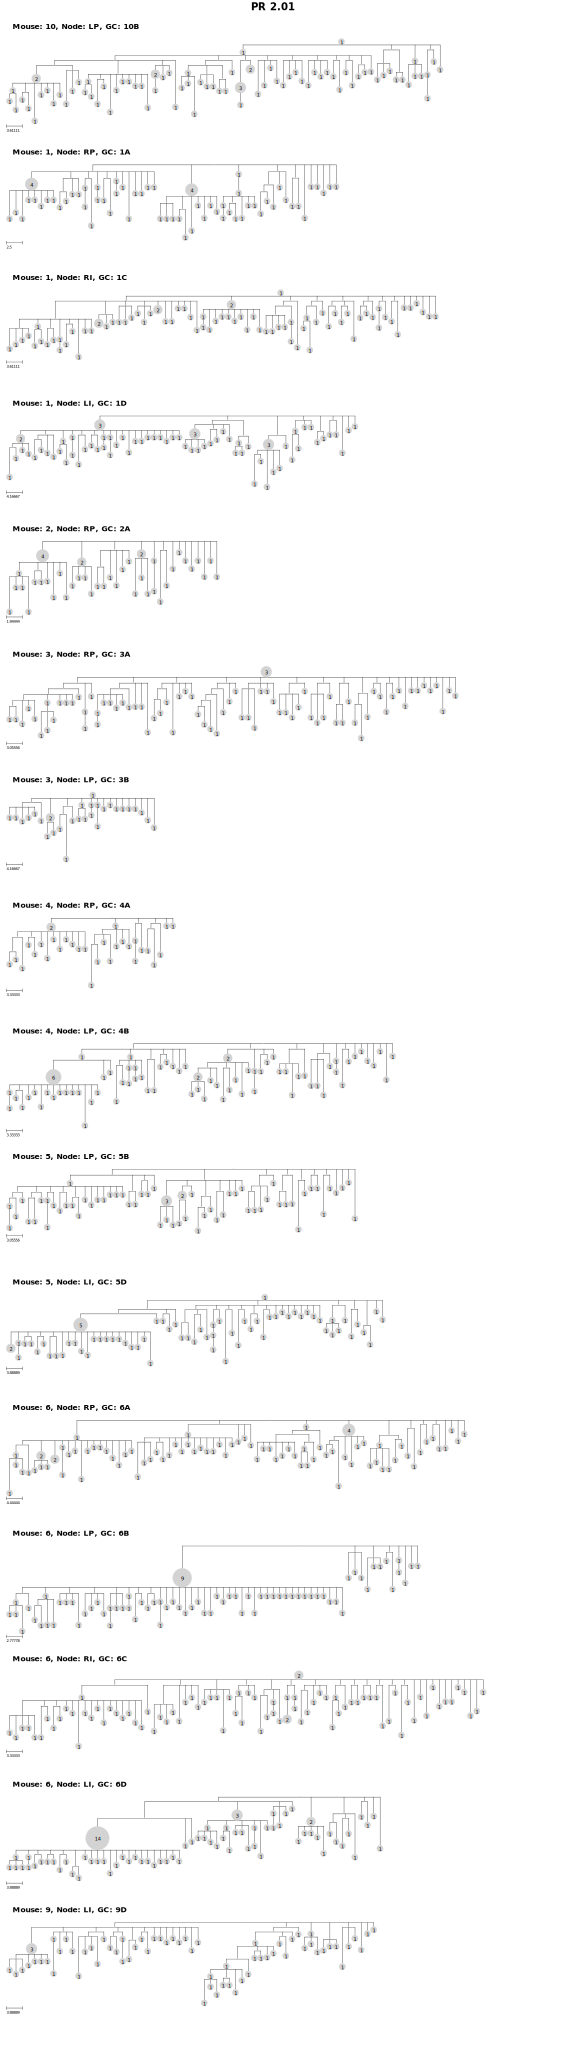

Skipping results/gctrees/PR2.02-12-LP-12B-GC/gctree.inference.1.svg


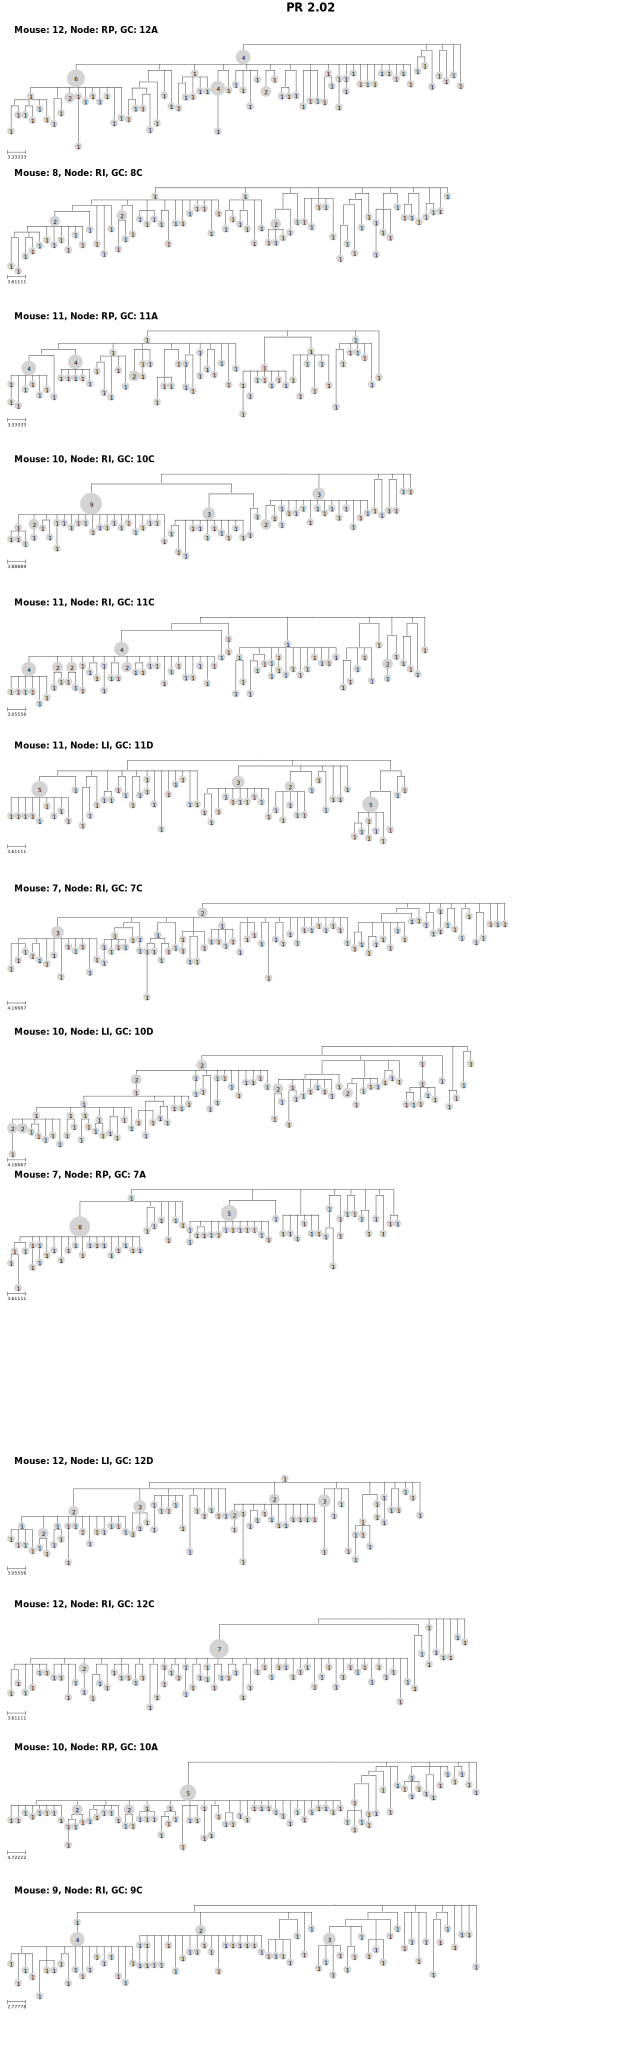

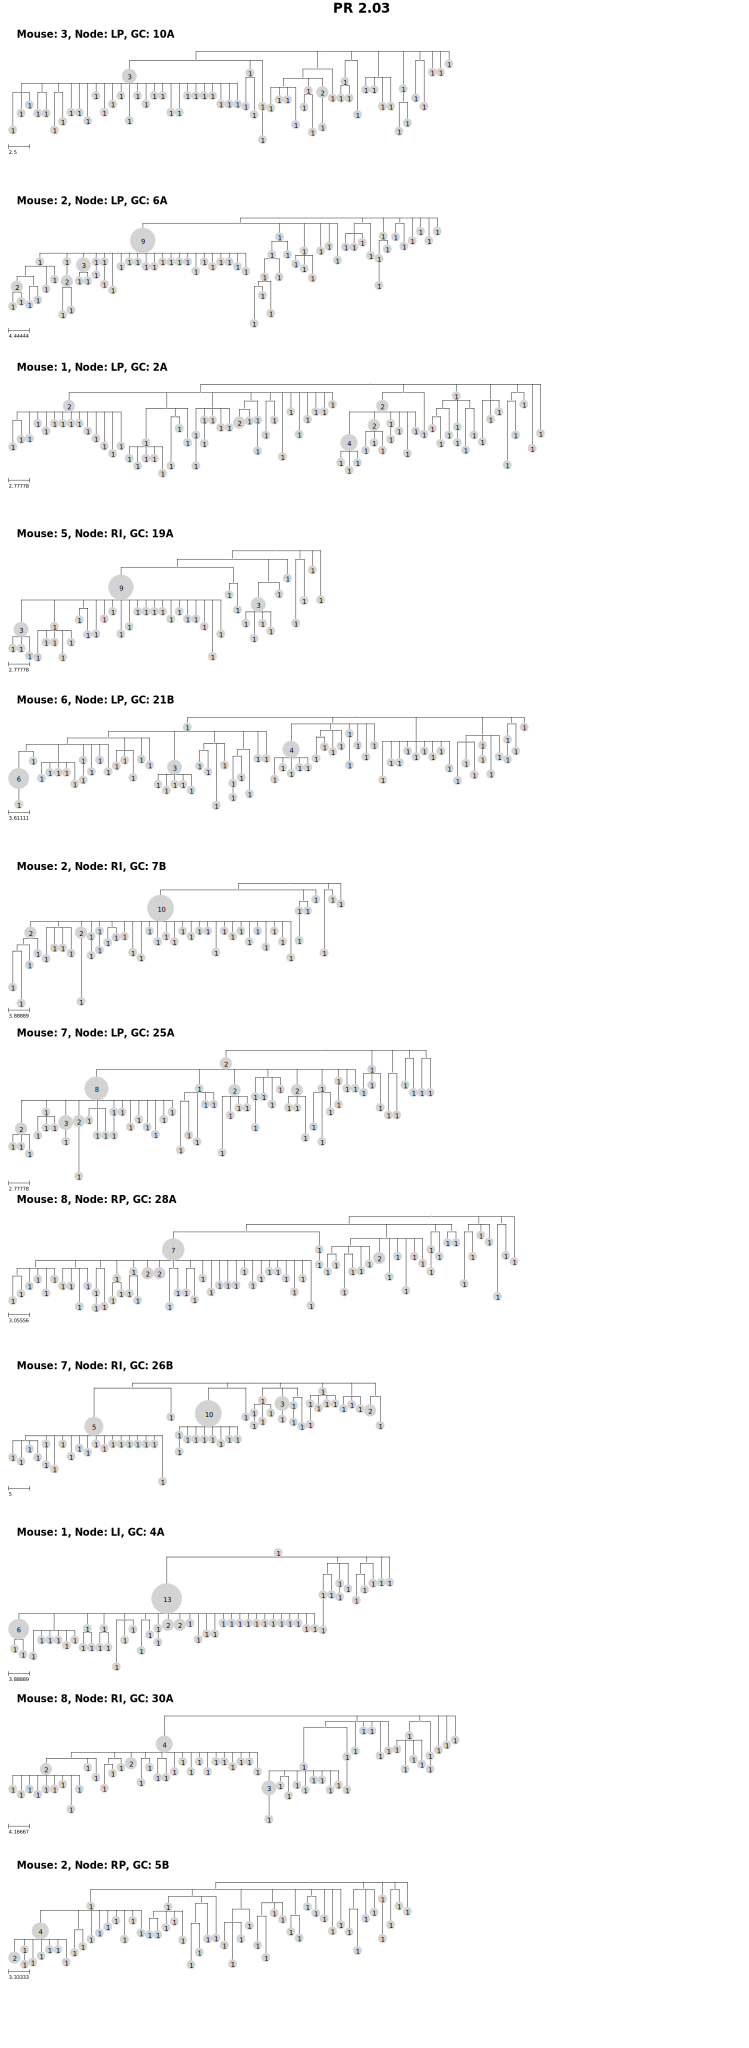

Skipping results/gctrees/PR2.04-1-RP-1B-GC/gctree.inference.1.svg


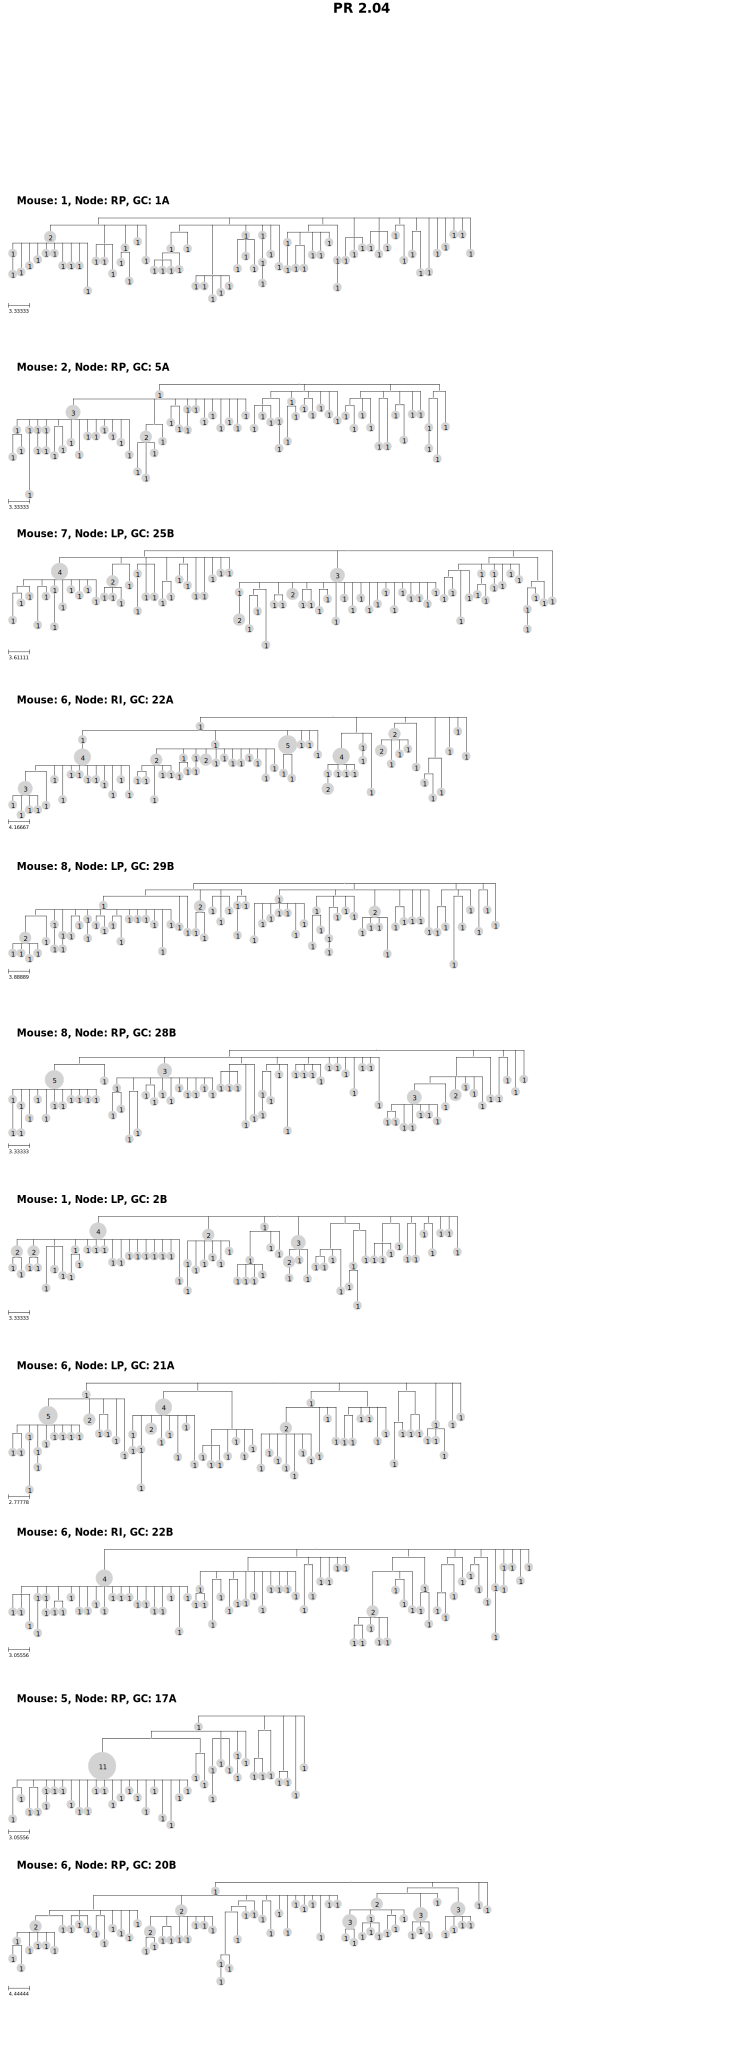

In [45]:

# def create_subpanel(svg_path, annotation, position, scale=0.5):

# loop through each row, and find the corresponding tree in the results directory named "PR<PR>-<mouse>-<node>-<gc>-GC"
for pr, pr_df in manifest_df.groupby('PR'):

    pr_str = f"{pr:.2f}"

    # Create an empty figure
    fig = sg.SVGFigure()

    # Initial y position for stacking
    y_offset = 60
    all_panels = []

    all_panels.append(Text(f"PR {pr_str}", 400, 15, size=16, weight='bold'))

    for i, row in pr_df.iterrows():

        position=(10, y_offset)
        svg_path = f"{results_dir}/PR{pr_str}-{row['mouse']}-{row['node']}-{row['gc']}-GC/{svg_filename}"
        annotation = f"Mouse: {row['mouse']}, Node: {row['node']}, GC: {row['gc']}"
        # print(svg_path)
        if not os.path.exists(svg_path):
            print(f"Skipping {svg_path}")
            # panel = Panel(
            #   Text(f"(!) No tree found for: {annotation}", 10, 0, size=12, weight='bold', color="red")
            # #   Text(f"(!) No tree found for: {svg_path}", 10, 0, size=12, weight='bold', color="red")
            # ).move(*position)
            # all_panels.append(panel)
        else:
            # Create a subpanel
            panel = Panel(
                    SVG(svg_path).scale(0.5),
                    Text(annotation, 10, -15, size=12, weight='bold')
            ).move(*position)
            all_panels.append(panel)

        y_offset += 200

    fig = Figure("%dpx" % 900, "%dpx" % y_offset, *all_panels)
    # fig.set_size(())
    fig.save(f"{output_dir}/PR{pr_str}.{svg_filename}")
    ip_display(ip_SVG(f"{output_dir}/PR{pr_str}.{svg_filename}"))